In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
covid_df=pd.read_csv("D:\Covid-19 Data.csv")

# Data Cleaning and exploration

In [3]:
covid_df.head(8)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,03-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,04-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,05-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,06-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,07-01-2020,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,08-01-2020,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,09-01-2020,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,10-01-2020,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
covid_df.shape

(290038, 67)

In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290038 entries, 0 to 290037
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    290038 non-null  object 
 1   continent                                   290038 non-null  object 
 2   location                                    290038 non-null  object 
 3   date                                        290038 non-null  object 
 4   total_cases                                 254267 non-null  float64
 5   new_cases                                   281307 non-null  float64
 6   new_cases_smoothed                          280103 non-null  float64
 7   total_deaths                                233965 non-null  float64
 8   new_deaths                                  281403 non-null  float64
 9   new_deaths_smoothed                         280233 non-null  float64
 

In [6]:
covid_df.drop(['new_cases_smoothed','new_deaths_smoothed','total_cases_per_million',
'new_cases_per_million', 'new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_smoothed_per_million',
'new_deaths_per_million', 'icu_patients','icu_patients_per_million', 'hosp_patients',
'hosp_patients_per_million', 'weekly_icu_admissions','weekly_icu_admissions_per_million', 
'weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_tests_per_thousand', 'new_tests_per_thousand',
'new_tests_smoothed', 'new_tests_smoothed_per_thousand','positive_rate', 'tests_per_case', 'tests_units', 'total_boosters', 
'new_vaccinations_smoothed','total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred','new_vaccinations_smoothed_per_million',
'new_people_vaccinated_smoothed','new_people_vaccinated_smoothed_per_hundred','handwashing_facilities',
'hospital_beds_per_thousand','excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
'excess_mortality', 'excess_mortality_cumulative_per_million','female_smokers', 'male_smokers'],axis=1,inplace=True)


In [7]:
covid_df.fillna(0,inplace=True)

In [8]:
covid_df = covid_df.reindex(columns=['iso_code', 'continent', 'location', 'date', 'population', 'human_development_index','total_cases', 
                                     'new_cases','total_deaths', 'new_deaths','total_vaccinations','new_vaccinations','people_vaccinated', 'people_fully_vaccinated',
                                     'reproduction_rate', 'total_tests', 'new_tests', 'stringency_index','gdp_per_capita',
                                     'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
                                     'extreme_poverty', 'cardiovasc_death_rate','diabetes_prevalence','life_expectancy'])

In [9]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 24)
pd.options.display.float_format = '{:,.2f}'.format

In [10]:
covid_df

,iso_code,continent,location,date,population,human_development_index,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,new_vaccinations,...,total_tests,new_tests,stringency_index,gdp_per_capita,population_density,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,life_expectancy
0,AFG,Asia,Afghanistan,03-01-2020,41128772,0.51,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,"1,803.99",54.42,18.60,2.58,1.34,0.00,597.03,9.59,64.83
1,AFG,Asia,Afghanistan,04-01-2020,41128772,0.51,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,"1,803.99",54.42,18.60,2.58,1.34,0.00,597.03,9.59,64.83
2,AFG,Asia,Afghanistan,05-01-2020,41128772,0.51,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,"1,803.99",54.42,18.60,2.58,1.34,0.00,597.03,9.59,64.83
3,AFG,Asia,Afghanistan,06-01-2020,41128772,0.51,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,"1,803.99",54.42,18.60,2.58,1.34,0.00,597.03,9.59,64.83
4,AFG,Asia,Afghanistan,07-01-2020,41128772,0.51,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,"1,803.99",54.42,18.60,2.58,1.34,0.00,597.03,9.59,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290033,ZWE,Africa,Zimbabwe,15-04-2023,16320539,0.57,"264,607.00",10.00,"5,684.00",0.00,0.00,0.00,...,0.00,0.00,0.00,"1,899.78",42.73,19.60,2.82,1.88,21.40,307.85,1.82,61.49
290034,ZWE,Africa,Zimbabwe,16-04-2023,16320539,0.57,"264,610.00",3.00,"5,684.00",0.00,0.00,0.00,...,0.00,0.00,0.00,"1,899.78",42.73,19.60,2.82,1.88,21.40,307.85,1.82,61.49
290035,ZWE,Africa,Zimbabwe,17-04-2023,16320539,0.57,"264,613.00",3.00,"5,684.00",0.00,0.00,0.00,...,0.00,0.00,0.00,"1,899.78",42.73,19.60,2.82,1.88,21.40,307.85,1.82,61.49
290036,ZWE,Africa,Zimbabwe,18-04-2023,16320539,0.57,"264,613.00",0.00,"5,684.00",0.00,0.00,0.00,...,0.00,0.00,0.00,"1,899.78",42.73,19.60,2.82,1.88,21.40,307.85,1.82,61.49


In [11]:
covid_df.rename(columns = {'location':'Country'}, inplace = True)

In [12]:
covid_df["Country"].nunique()

243

## Total Cases Vs Total Deaths

In [13]:
total_cases_total_deaths = pd.DataFrame({
    'Country': covid_df['Country'],
    'Date': covid_df['date'],
    'Total Cases': covid_df['total_cases'],
    'Total Deaths': covid_df['total_deaths'],
    'Death Percentage': covid_df['total_deaths'] / covid_df['total_cases']* 100
})

In [14]:
total_cases_total_deaths.loc[total_cases_total_deaths['Country'] == 'India']

,Country,Date,Total Cases,Total Deaths,Death Percentage
115452,India,03-01-2020,0.00,0.00,NaN
115453,India,04-01-2020,0.00,0.00,NaN
115454,India,05-01-2020,0.00,0.00,NaN
115455,India,06-01-2020,0.00,0.00,NaN
115456,India,07-01-2020,0.00,0.00,NaN
115457,India,08-01-2020,0.00,0.00,NaN
115458,India,09-01-2020,0.00,0.00,NaN
115459,India,10-01-2020,0.00,0.00,NaN
115460,India,11-01-2020,0.00,0.00,NaN
115461,India,12-01-2020,0.00,0.00,NaN


## Total Cases vs Population

In [15]:
Total_cases_total_population = pd.DataFrame({
    'Country': covid_df['Country'],
    'Date': covid_df['date'],
    'Total Cases': covid_df['total_cases'],
    'Population':covid_df['population'],
    'Infected Percentage':(covid_df['total_cases'] / covid_df['population'])*100
})


In [16]:
Total_cases_total_population.loc[Total_cases_total_population['Country'] == 'India']

,Country,Date,Total Cases,Population,Infected Percentage
115452,India,03-01-2020,0.00,1417173120,0.00
115453,India,04-01-2020,0.00,1417173120,0.00
115454,India,05-01-2020,0.00,1417173120,0.00
115455,India,06-01-2020,0.00,1417173120,0.00
115456,India,07-01-2020,0.00,1417173120,0.00
115457,India,08-01-2020,0.00,1417173120,0.00
115458,India,09-01-2020,0.00,1417173120,0.00
115459,India,10-01-2020,0.00,1417173120,0.00
115460,India,11-01-2020,0.00,1417173120,0.00
115461,India,12-01-2020,0.00,1417173120,0.00


## Countries with Highest Infection Rate compared to Population

In [17]:
result=covid_df.groupby(['Country', 'population']).agg(
    {'total_cases': 'max'}).reset_index()

result['PercentPopulationInfected'] = result['total_cases'] / result['population'] * 100

result.sort_values('PercentPopulationInfected', ascending=False, inplace=True)

result.rename(columns={'total_cases': 'Max_Infection_Count','population':'Max_population'}, inplace=True)

result

,Country,Max_population,Max_Infection_Count,PercentPopulationInfected
52,Cyprus,896007,"656,904.00",73.31
187,San Marino,33690,"23,961.00",71.12
12,Austria,8939617,"6,054,092.00",67.72
68,Faeroe Islands,53117,"34,658.00",65.25
30,Brunei,449002,"285,740.00",63.64
198,Slovenia,2119843,"1,342,787.00",63.34
80,Gibraltar,32677,"20,550.00",62.89
131,Martinique,367512,"229,674.00",62.49
4,Andorra,79843,"47,945.00",60.05
106,Jersey,110796,"66,391.00",59.92


## Countries with Highest Death Count per Population

In [18]:
output=covid_df.groupby(["Country","population"]).agg({'total_deaths':'max'}).reset_index()

output["Death_percentage"]=output["total_deaths"]/output["population"]*100

output.sort_values('Death_percentage', ascending=False, inplace=True)

output.rename(columns={'total_deaths': 'Max_death_Count','population':'Max_population'}, inplace=True)

output


,Country,Max_population,Max_death_Count,Death_percentage
168,Peru,34049588,"219,991.00",0.65
31,Bulgaria,6781955,"38,290.00",0.56
26,Bosnia and Herzegovina,3233530,"16,332.00",0.51
94,Hungary,9967304,"48,743.00",0.49
156,North Macedonia,2093606,"9,671.00",0.46
77,Georgia,3744385,"17,049.00",0.46
49,Croatia,4030361,"18,129.00",0.45
140,Montenegro,627082,"2,808.00",0.45
198,Slovenia,2119843,"9,267.00",0.44
53,Czechia,10493990,"42,732.00",0.41


## Effect of strigency index on new cases and new deaths

In [19]:
stringency_cases_deaths = covid_df[['date','stringency_index',"Country" ,'new_cases', 'new_deaths']]
stringency_cases_deaths=stringency_cases_deaths.loc[stringency_cases_deaths["Country"]=="India"]
stringency_cases_deaths["Death_percentage"]=stringency_cases_deaths["new_deaths"]/stringency_cases_deaths["new_cases"]*100

In [20]:
stringency_cases_deaths

,date,stringency_index,Country,new_cases,new_deaths,Death_percentage
115452,03-01-2020,0.00,India,0.00,0.00,NaN
115453,04-01-2020,0.00,India,0.00,0.00,NaN
115454,05-01-2020,0.00,India,0.00,0.00,NaN
115455,06-01-2020,0.00,India,0.00,0.00,NaN
115456,07-01-2020,0.00,India,0.00,0.00,NaN
115457,08-01-2020,0.00,India,0.00,0.00,NaN
115458,09-01-2020,0.00,India,0.00,0.00,NaN
115459,10-01-2020,0.00,India,0.00,0.00,NaN
115460,11-01-2020,0.00,India,0.00,0.00,NaN
115461,12-01-2020,0.00,India,0.00,0.00,NaN


## Countrywise Death Count

In [21]:
Total_death=covid_df[['Country',"new_deaths"]]

In [22]:
death_rate=Total_death.groupby('Country')["new_deaths"].sum()

In [23]:
sorted_data = death_rate.sort_values(ascending=False).head(5)
sorted_data

Country
United States   1,122,966.00
Brazil            700,811.00
India             531,152.00
Russia            397,901.00
Mexico            333,669.00
Name: new_deaths, dtype: float64

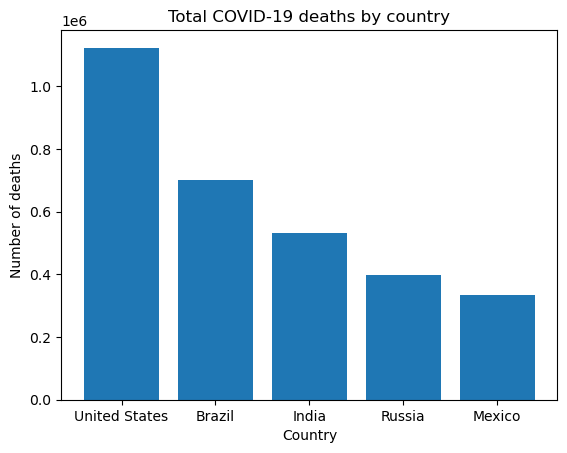

In [24]:
plt.bar(sorted_data.index, sorted_data.values)
plt.title("Total COVID-19 deaths by country")
plt.xlabel("Country")
plt.ylabel("Number of deaths")
plt.show()

## Countrywise Total Cases

In [25]:
total_cases=covid_df[["Country","new_cases"]].groupby("Country")["new_cases"].sum()
total_cases.sort_values(ascending=False)

Country
United States                      102,977,396.00
China                               99,240,488.00
India                               44,835,613.00
France                              38,843,098.00
Germany                             38,385,526.00
Brazil                              37,358,665.00
Japan                               33,580,723.00
South Korea                         30,994,088.00
Italy                               25,737,170.00
United Kingdom                      24,555,629.00
Russia                              22,776,383.00
Turkey                              17,004,677.00
Spain                               13,813,830.00
Vietnam                             11,531,072.00
Australia                           11,178,368.00
Argentina                           10,044,957.00
Netherlands                          8,610,372.00
Iran                                 7,603,697.00
Mexico                               7,563,577.00
Indonesia                            6,759

## Continentwise Death Count

In [26]:
Continent_total_death=covid_df.groupby("continent")["new_deaths"].sum().sort_values(ascending=False).head(3)
Continent_total_death

continent
Europe          2,050,706.00
Asia            1,629,441.00
North America   1,596,578.00
Name: new_deaths, dtype: float64

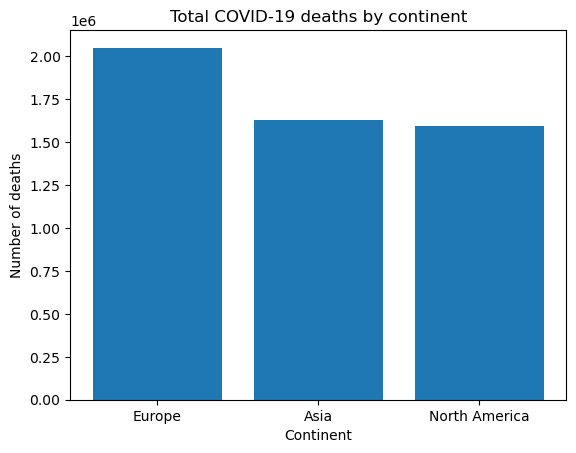

In [27]:
plt.bar(Continent_total_death.index, Continent_total_death.values)
plt.title("Total COVID-19 deaths by continent")
plt.xlabel("Continent")
plt.ylabel("Number of deaths")
plt.show()

## Continentwise total cases

In [28]:
Continent_total_cases=covid_df.groupby("continent")["new_cases"].sum().sort_values(ascending=False)
Continent_total_cases

continent
Asia            296,103,856.00
Europe          248,639,759.00
North America   123,632,489.00
South America    68,391,967.00
Oceania          13,908,795.00
Africa           13,077,962.00
Name: new_cases, dtype: float64

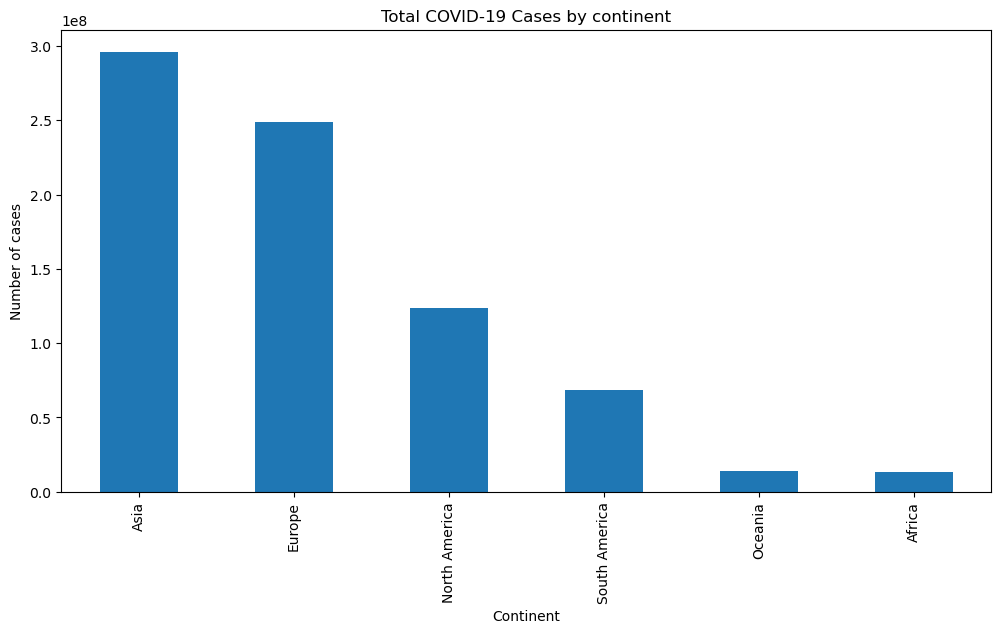

In [29]:
Continent_total_cases.plot(kind='bar', y='new_cases', figsize=(12,6))
plt.title("Total COVID-19 Cases by continent")
plt.xlabel("Continent")
plt.ylabel("Number of cases")
plt.show()

## continent death percentage

In [30]:
continent_death_percentage = (Continent_total_death / Continent_total_cases * 100).round(10)

In [31]:
Continent_death_percentage=pd.DataFrame({
    "Continent_cases":covid_df.groupby("continent")["new_cases"].sum(),
    "Continent_deaths":covid_df.groupby("continent")["new_deaths"].sum(),
    "Continent_death_percentage":continent_death_percentage
}

)
Continent_death_percentage

,Continent_cases,Continent_deaths,Continent_death_percentage
continent,,,
Africa,"13,077,962.00","258,873.00",NaN
Asia,"296,103,856.00","1,629,441.00",0.55
Europe,"248,639,759.00","2,050,706.00",0.82
North America,"123,632,489.00","1,596,578.00",1.29
Oceania,"13,908,795.00","25,997.00",NaN
South America,"68,391,967.00","1,353,500.00",NaN


## Countrywise Percentage of people fully vaccinated

In [32]:
o=covid_df.groupby(["Country"]).agg({"population":"max","people_fully_vaccinated":"max"})
o["percentage_fully_vaccinated"] = o["people_fully_vaccinated"] / o["population"] * 100
o=o.sort_values("people_fully_vaccinated",ascending=False).head(10)
o

,population,people_fully_vaccinated,percentage_fully_vaccinated
Country,,,
China,1425887360,"1,276,760,000.00",89.54
India,1417173120,"951,966,628.00",67.17
United States,338289856,"230,485,008.00",68.13
Brazil,215313504,"176,164,186.00",81.82
Indonesia,275501344,"172,693,321.00",62.68
Pakistan,235824864,"140,408,745.00",59.54
Bangladesh,171186368,"139,778,647.00",81.65
Japan,123951696,"103,374,308.00",83.40
Vietnam,98186856,"85,861,691.00",87.45


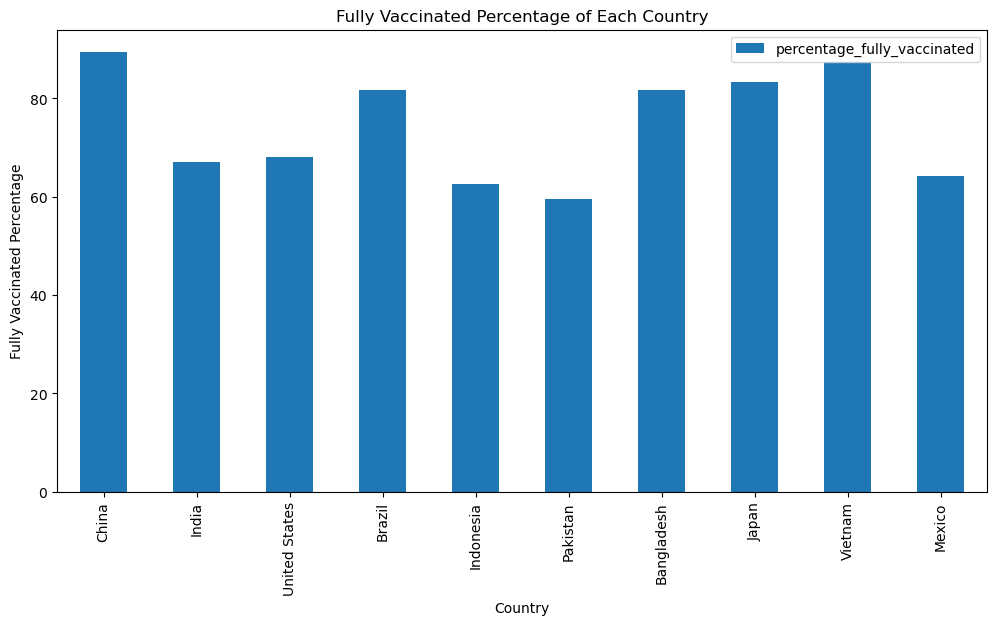

In [33]:

o.plot(kind='bar', y='percentage_fully_vaccinated', figsize=(12,6))
plt.xlabel('Country')
plt.ylabel('Fully Vaccinated Percentage')
plt.title('Fully Vaccinated Percentage of Each Country')
plt.show()

## Countrywise Percentage of people partially vaccinated

In [34]:
o=covid_df.groupby(["Country"]).agg({"population":"max","people_vaccinated":"max"})
o['percentage_partially_vaccinated'] = o["people_vaccinated"] / o["population"] * 100
o=o.sort_values("people_vaccinated",ascending=False).head(10)
o

,population,people_vaccinated,percentage_partially_vaccinated
Country,,,
China,1425887360,"1,310,292,000.00",91.89
India,1417173120,"1,027,403,591.00",72.50
United States,338289856,"269,971,358.00",79.80
Indonesia,275501344,"203,657,535.00",73.92
Brazil,215313504,"189,643,431.00",88.08
Pakistan,235824864,"165,530,412.00",70.19
Bangladesh,171186368,"151,319,642.00",88.39
Japan,123951696,"104,700,838.00",84.47
Mexico,127504120,"97,179,493.00",76.22


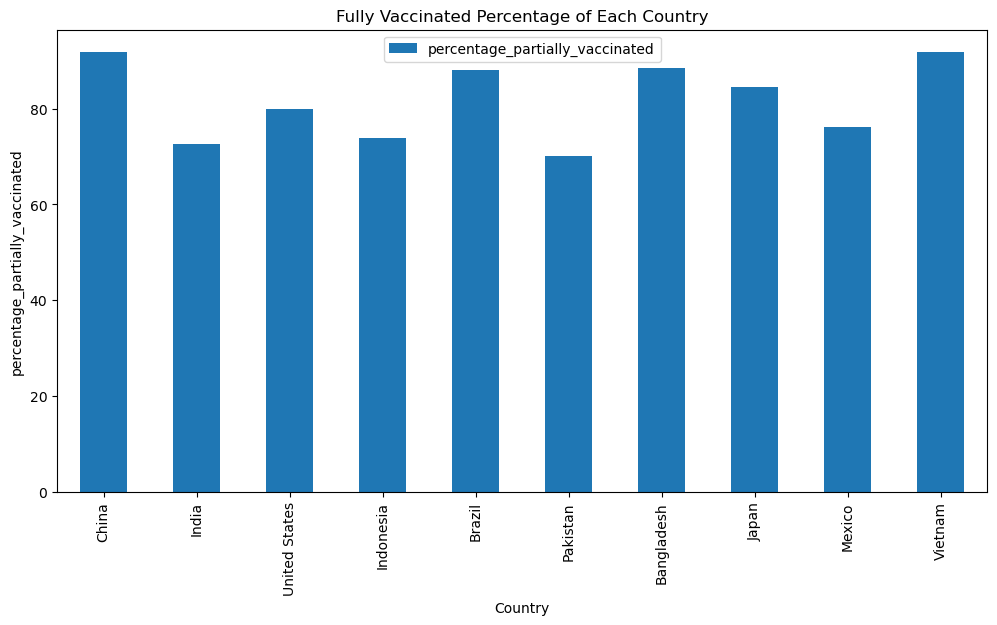

In [35]:

o.plot(kind='bar', y='percentage_partially_vaccinated', figsize=(12,6))
plt.xlabel('Country')
plt.ylabel('percentage_partially_vaccinated')
plt.title('Fully Vaccinated Percentage of Each Country')
plt.show()

## Continent Total Population vs Vaccinations

In [36]:
o=covid_df.groupby(["continent"]).agg({"population":"max","people_fully_vaccinated":"max"})
o["percentage_fully_vaccinated"] = o["people_fully_vaccinated"] / o["population"] * 100
o.sort_values("people_fully_vaccinated",ascending=False)

,population,people_fully_vaccinated,percentage_fully_vaccinated
continent,,,
Asia,1425887360,"1,276,760,000.00",89.54
North America,338289856,"230,485,008.00",68.13
South America,215313504,"176,164,186.00",81.82
Europe,144713312,"79,700,511.00",55.07
Africa,218541216,"69,793,071.00",31.94
Oceania,26177410,"21,654,488.00",82.72


## What is the correlation between COVID-19 cases and population density?

In [37]:
pop_density_cases = covid_df[['population_density', 'total_cases']]
corr_coef = pop_density_cases.corr()['population_density']['total_cases']
corr_coef

-0.021620181068381036

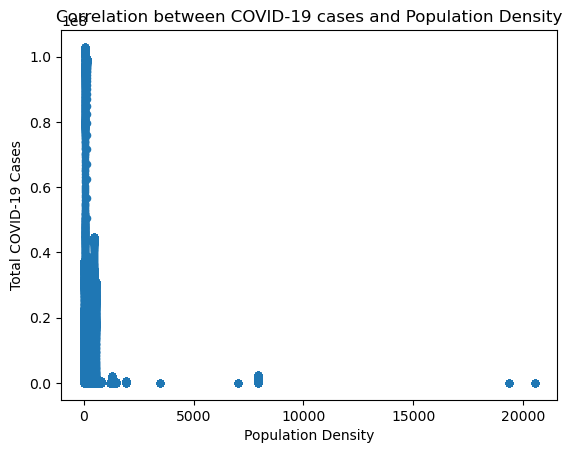

In [38]:
pop_density_cases.plot(kind='scatter', x='population_density', y='total_cases')
plt.xlabel('Population Density')
plt.ylabel('Total COVID-19 Cases')
plt.title('Correlation between COVID-19 cases and Population Density')
plt.show()